# TP FINAL

## Consignas

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\

**Ejercicio 7**\
Sobre el Dataset Elegido  explique si se puede reducir las dimensiones  y que representa esas  nuevas variables.

**Para los que entregan en blanco**

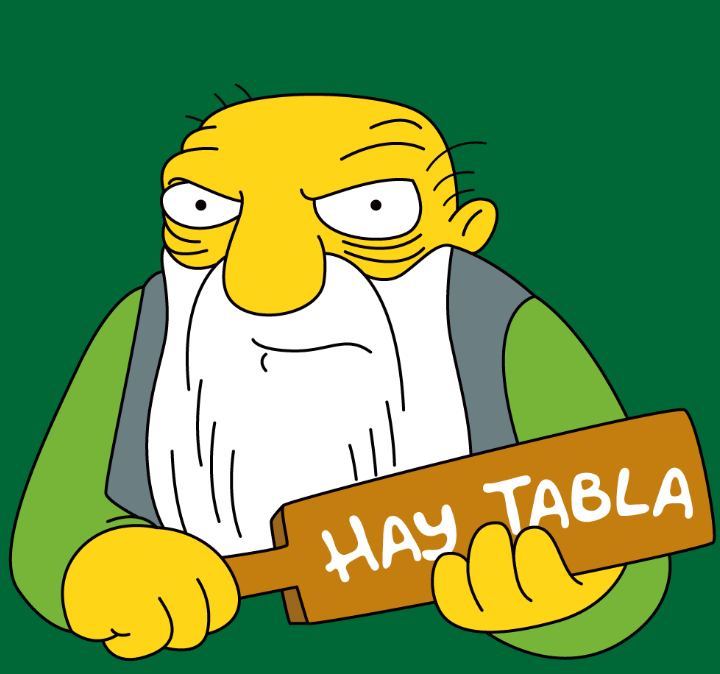

## Resoluciones

### Punto 1:

**Dataset Tasa de de VIH por 100 mil habitantes**

Voy a utilizar el dataset  "Tasa de VIH por 100 mil habitantes por sexo y grupo etario 2020-2022", obtenido de la web:

http://datos.salud.gob.ar/dataset/13932ccb-a539-4bea-986f-9dae09e06503/archivo/537e4cb2-01f5-4fec-b098-368cdc82e07e


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
url = '/content/drive/MyDrive/Colab Notebooks/Arg_prog/tasa-vih-sexo-grupo-etario-2010-2022-argentina.csv'
df = pd.read_csv(url)

df

,id_sexo,sexo,id_grupo_etario,grupo_etario,anio,tasa_vih
0,3,ambos_sexos,10,total_grupo,2010,17.6
1,3,ambos_sexos,10,total_grupo,2011,17.4
2,3,ambos_sexos,10,total_grupo,2012,17.3
3,3,ambos_sexos,10,total_grupo,2013,17.1
4,3,ambos_sexos,10,total_grupo,2014,15.3
...,...,...,...,...,...,...
385,1,varones,9,65 o más,2018,2.0
386,1,varones,9,65 o más,2019,2.3
387,1,varones,9,65 o más,2020,1.7
388,1,varones,9,65 o más,2021,2.8


### Punto 2:

**Descripción del dataset y sus variables**

El dataset indica la tasa de personas que llevan el virus de inmunodeficiencia adquirida (VIH) en nuestro país por cada 100 mil habitantes.

Las tasas se calculan por año, y se categorizan en sexo de la persona y rango etaria a la cuál pertenece.

Las variables que se encuentran en el dataset son:

| Campo | Descripción | Contenido |
| --- | --- | --- |
| id_sexo | Es un número de ID que indica el sexo de la persona | Los valores a tomar son: 1= Varones, 2= Mujeres, 3 = Ambos_sexos |
| sexo | Indica el sexo al cuál pertenece la persona | Coincide con el id_sexo en los valores a tomar |
| id_grupo_etario | Es un número identificador del grupo etario al cual pertenece la persona | Toma los valores del 1 al 10 |
| grupo_etario | Indica el rango etario al cuál pertenece la persona | Se relaciona con el id_grupo_etario, tomando los siguientes valores: 0-9, 10-14, 15-19, 20-24, 25-34, 35-44, 45-54, 55-64, 64 o mas, total_grupo  |
| anio | Indica el año del relevo | Abarca desde el año 2010 al 2022, inclusive  |
|tasa_vih | Indica la tasa de personas que poseen el virus del VIH | Es un valor decimal entre 0 (nadie) y 100 (todos) |

### Punto 3:

**Tipos de variables del dataset**

 Campo | Tipo de variable | Justificación |
| --- | --- | --- |
| id_sexo | Categorica nominal | Sirve para dividir en categorias, pero sin orden ni relación numérica entre ellas, es un id   |
| sexo | Categorica nominal | Sirve para dividir en categorias, pero sin orden ni relación numérica entre ellas |
| id_grupo_etario | Categórica ordinal | Sive para dividir en categorias, pero tienen un orden ya que se trata de rangos etarios |
| grupo_etario | Categórica ordinal | Sive para dividir en categorias, pero tienen un orden ya que se trata de rangos etarios |
| anio | Temporal | Indica el año de la muestra |
|tasa_vih | Numerica continua | Es un valor decimal que se presenta dentro de un rango especifico |

### Punto 4:

**Analisis de valores ausentes y atípicos**

In [4]:
#Valores ausentes

va = df.isnull().sum()
va

id_sexo            0
sexo               0
id_grupo_etario    0
grupo_etario       0
anio               0
tasa_vih           0
dtype: int64

El dataframe no posee valores ausentes.

In [5]:
# Valores atípicos

Q1 = df['tasa_vih'].quantile(0.25)
Q3 = df['tasa_vih'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['tasa_vih'] < lower_bound) | (df['tasa_vih'] > upper_bound)]

print("Valores Atípicos para la columna tasa_vih del dataframe:")
print(outliers)

Valores Atípicos para la columna tasa_vih del dataframe:
     id_sexo     sexo  id_grupo_etario grupo_etario  anio  tasa_vih
325        1  varones                5      25 - 34  2010      51.5
326        1  varones                5      25 - 34  2011      52.4
327        1  varones                5      25 - 34  2012      53.3
328        1  varones                5      25 - 34  2013      55.4
329        1  varones                5      25 - 34  2014      53.6
330        1  varones                5      25 - 34  2015      53.9
331        1  varones                5      25 - 34  2016      49.4
338        1  varones                6      35 - 44  2010      52.5
339        1  varones                6      35 - 44  2011      50.1


Vamos que a diferencia de los valores ausentes, el dataframe si presenta valores atípicos. Se buscaron los valores atípicos en la columna *tasa_vih* ya que el resto de los valores se encuentran dentro de un rango de elección.

Se decidio conservar estos valores, ya que pueden llegar a servir para investigar porque se dieron estos valores, para que no vuelvan a repetirse.

### Punto 5:

Analisis univariado de gráficos y conclusiones.


Analisis por grupo etario:

 Gráfico de evolucion de la tasa por grupo por año (son 10 graficos)

 Ver como quedo el grafico de densidad de tasa por grupo etario o por año quiza da información

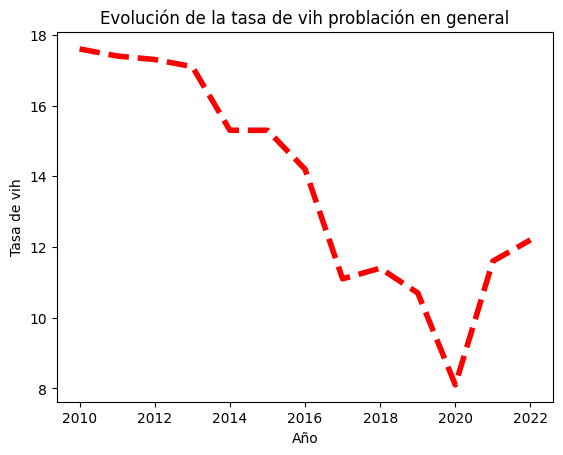

In [6]:
df_grupo_etario_10 = df.drop(df[df['id_grupo_etario'] != 10].index, axis=0) #Elimino los registros que no sean el grupo etario total
df_ambos_sexos = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 3].index, axis=0)

fig1, ax1 = plt.subplots()

ax1.plot(df_ambos_sexos['anio'],df_ambos_sexos['tasa_vih'],color='red',linestyle='--',linewidth=4)
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de vih')
ax1.set_title('Evolución de la tasa de vih problación en general')

plt.show()

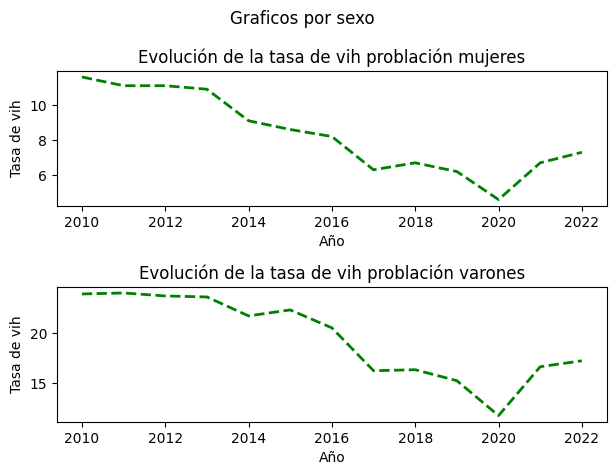

In [7]:
#Analisis por sexo

df_mujeres = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 2 ].index, axis=0)
df_varones = df_grupo_etario_10.drop(df_grupo_etario_10[df_grupo_etario_10['id_sexo']!= 1 ].index, axis=0)

#Ploting
fig2, ax2 = plt.subplots(2,1)

ax2[0].plot(df_mujeres['anio'],df_mujeres['tasa_vih'],color='green',linestyle='--', linewidth=2)
ax2[0].set_xlabel('Año')
ax2[0].set_ylabel('Tasa de vih')
ax2[0].set_title('Evolución de la tasa de vih problación mujeres')

ax2[1].plot(df_varones['anio'],df_varones['tasa_vih'],color='green',linestyle='--',linewidth=2)
ax2[1].set_xlabel('Año')
ax2[1].set_ylabel('Tasa de vih')
ax2[1].set_title('Evolución de la tasa de vih problación varones')

fig2.suptitle('Graficos por sexo')
fig2.tight_layout()

plt.show()


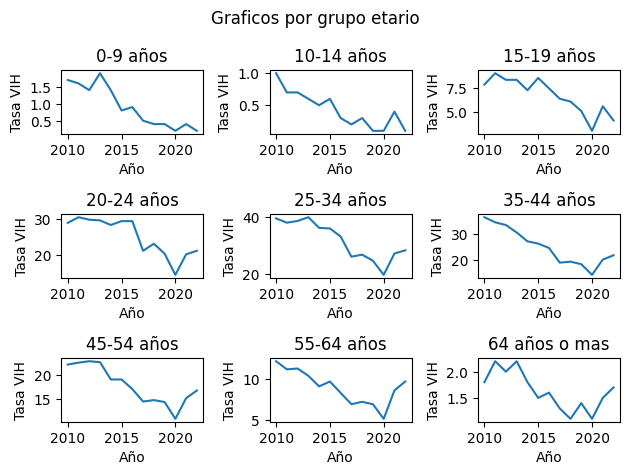

In [8]:
#Analisis por grupo etario

df_sexo_ambos = df.drop(df[df['id_sexo'] != 3].index, axis=0)

df_etario_1 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 1].index, axis =0)
df_etario_2 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 2].index, axis =0)
df_etario_3 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 3].index, axis =0)
df_etario_4 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 4].index, axis =0)
df_etario_5 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 5].index, axis =0)
df_etario_6 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 6].index, axis =0)
df_etario_7 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 7].index, axis =0)
df_etario_8 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 8].index, axis =0)
df_etario_9 = df_sexo_ambos.drop(df_sexo_ambos[df_sexo_ambos['id_grupo_etario'] != 9].index, axis =0)

#Ploting

fig3, ax3 = plt.subplots(3,3)

ax3[0][0].plot(df_etario_1['anio'],df_etario_1['tasa_vih'])
ax3[0][0].set_xlabel('Año')
ax3[0][0].set_ylabel('Tasa VIH')
ax3[0][0].set_title('0-9 años')

ax3[0][1].plot(df_etario_2['anio'],df_etario_2['tasa_vih'])
ax3[0][1].set_xlabel('Año')
ax3[0][1].set_ylabel('Tasa VIH')
ax3[0][1].set_title('10-14 años')

ax3[0][2].plot(df_etario_3['anio'],df_etario_3['tasa_vih'])
ax3[0][2].set_xlabel('Año')
ax3[0][2].set_ylabel('Tasa VIH')
ax3[0][2].set_title('15-19 años')

ax3[1][0].plot(df_etario_4['anio'],df_etario_4['tasa_vih'])
ax3[1][0].set_xlabel('Año')
ax3[1][0].set_ylabel('Tasa VIH')
ax3[1][0].set_title('20-24 años')

ax3[1][1].plot(df_etario_5['anio'],df_etario_5['tasa_vih'])
ax3[1][1].set_xlabel('Año')
ax3[1][1].set_ylabel('Tasa VIH')
ax3[1][1].set_title('25-34 años')

ax3[1][2].plot(df_etario_6['anio'],df_etario_6['tasa_vih'])
ax3[1][2].set_xlabel('Año')
ax3[1][2].set_ylabel('Tasa VIH')
ax3[1][2].set_title('35-44 años')

ax3[2][0].plot(df_etario_7['anio'],df_etario_7['tasa_vih'])
ax3[2][0].set_xlabel('Año')
ax3[2][0].set_ylabel('Tasa VIH')
ax3[2][0].set_title('45-54 años')

ax3[2][1].plot(df_etario_8['anio'],df_etario_8['tasa_vih'])
ax3[2][1].set_xlabel('Año')
ax3[2][1].set_ylabel('Tasa VIH')
ax3[2][1].set_title('55-64 años')

ax3[2][2].plot(df_etario_9['anio'],df_etario_9['tasa_vih'])
ax3[2][2].set_xlabel('Año')
ax3[2][2].set_ylabel('Tasa VIH')
ax3[2][2].set_title('64 años o mas')

fig3.suptitle('Graficos por grupo etario')
fig3.tight_layout()

plt.show()


**Conclusiones**

Del análisis de todos los gráficos podemos concluir:

- La tendencia a la baja desde el año de comienzo de toma de datos (2010), con pico mínimo en el año 2020.
- Este mínimo podría haber sido causado debido a la pandemia de Covid-19, la cuál impulso a principios del año 2020 el Aislamiento Social Preventivo Obligatio (ASPO). Por lo que las personas que no se consideran de tareas esenciales no debian abandonar su domicilio.
- Debido al aislamiento que prohibia abandonar el domicilio, las personas no tenian relacion con quienes no habitaban el mismo domicilio, por lo cuál es el mayor indicado del porque se dio el pico mínimo en este año
- En cuanto a las diferencias por sexo, la tasa asociada a los varones se mantiene por sobre la tasa asociada a las mujeres. Esta tasa superior podría deberse a falta de prevención, cuidados, desconocimiento/ignorancia de las formas de contagio, desconomiento/ignorancia de si la persona con la cuál copula es portador del VIH, como así la falta de estudios frecuentes para corroborar la presencia del virus.
- En los gráficos de rangos etarios, notamos que la tendencia a la baja que se da desde el año 2010 con su pico mínimo en el año 2020, se mantienen entre las edades de 0 a 19 años.
- En cambio, en la franja etaria de 20 años en adelante, la tendencia a la suba de contagias es creciente.
- Las tendencias a la baja en menores de 19 años y de alza en mayores de 20, probablemente se deba a que los primeros mantienen menos relaciones sexuales, o al menos con menos personas, como así también a la prevención o cuidados de ellos, como así también de los padres que son VIH positivos pero mantienen cuidados y controles con sus hijos.
- Como conclusión final, podria decirse que es necesario recalcar la importancia de la prevención, cuidado, estudios y educación acerca de lo que se refiere a ser VIH positivo, tanto desde ambitos privados como publicos, con un fuerte incapie sobre todo a los varones entre 20 y 54 años, que es donde se presenta la mayor tasa de positivos.

### Punto 6
**Matriz de correlación de variables**

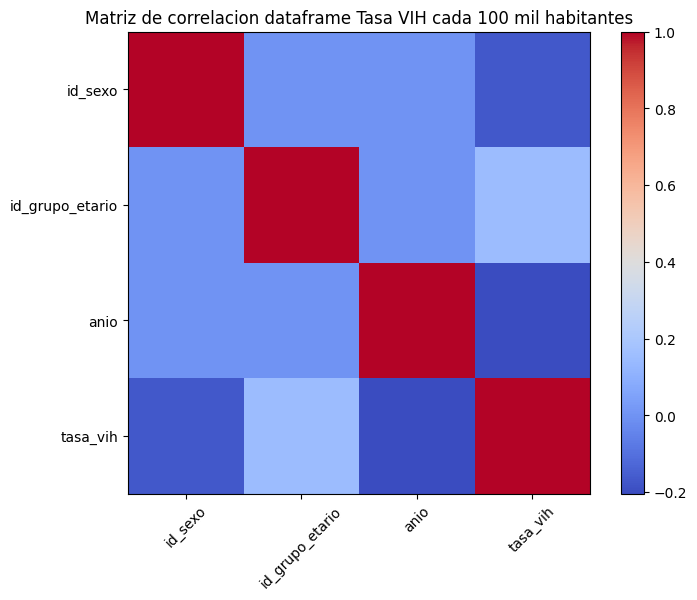

In [9]:
df_correlacion = df.drop(['sexo','grupo_etario'], axis=1)
correlacion = df_correlacion.corr()
plt.figure(figsize=(8,6))
plt.imshow(correlacion,cmap="coolwarm",interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlacion)),correlacion.columns,rotation=45)
plt.yticks(range(len(correlacion)),correlacion.columns)
plt.title("Matriz de correlacion dataframe Tasa VIH cada 100 mil habitantes")
plt.show()

Se denota una leve relación entre los datos de *grupo etario* y la *tasa de VIH*.

En cuanto al resto de la variables, no se relacionan entre sí como indica el gráfico anterior.



### Punto 7:

**Reducción del dataset**

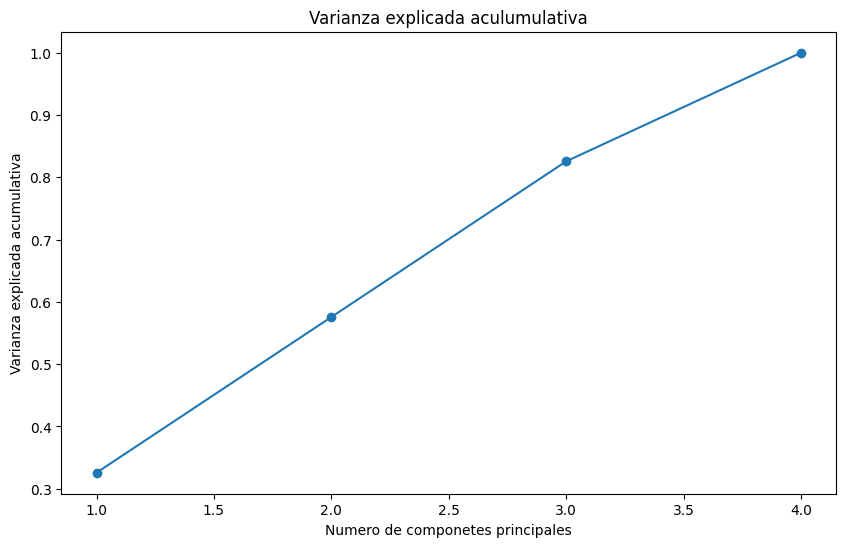

In [10]:

scaler= StandardScaler()

data_scaled = scaler.fit_transform(df_correlacion)

pca = PCA()
pca.fit(data_scaled)

explained_variance= pca.explained_variance_ratio_
cumulative_explained_variance= np.cumsum(explained_variance)
explained_variance.cumsum()


# Grafico de varianza explicada acumulativa

plt.figure(figsize=(10,6))
plt.plot(range(1,len(cumulative_explained_variance)+1),cumulative_explained_variance,marker="o")
plt.xlabel("Numero de componetes principales")
plt.ylabel("Varianza explicada acumulativa")
plt.title("Varianza explicada aculumulativa")
plt.show()

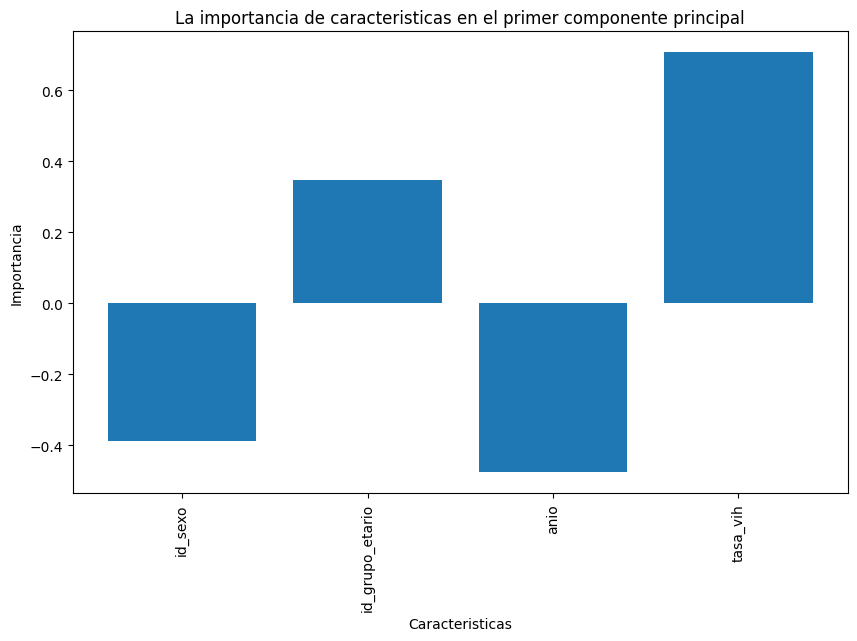

In [11]:

numero_decomponentes=3

pca=PCA(n_components=numero_decomponentes)
data_pca=pca.fit_transform(data_scaled)

componentes=pca.components_

plt.figure(figsize=(10,6))
plt.bar(range(len(componentes[0])),componentes[0])
plt.xticks(range(len(componentes[0])),df_correlacion.columns,rotation=90)
plt.xlabel("Caracteristicas")
plt.ylabel("Importancia")
plt.title("La importancia de caracteristicas en el primer componente principal")
plt.show()

En este caso, como vemos en el gráfico de varianza explicada acumulativa, no vemos convenienete reducir la cantidad de componentes del dataset, ya que en ningún momento se observa que la varianza deje de crecer.

De hecho, es practicamente lineal el crecimiento de la varianza acumulativa explicada en función de los componentes del dataset.

Aunque con los 3 primeros componenetes podriamos obtener aproximadamente el 80% de los datos del dataset original, teniendo que cuenta que la cantidad de componenetes es muy reducida, no optamos por la reducción del mismo.
